ВАРИАНТ 11

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import math

Координаты исходной функции заносятся в массивы

In [16]:
x = [1, 3, 5, 7]
y = [0.00, 1.10, 1.61, 1.95]

In [17]:
f2 = {}

Задание 1:
Построить многочлены Лагранжа 1 и 2 степеней для сеточного представления формульной
функции f(x). Найти значения многочленов в точке x* = 2.

Функция возвращает значение многочлена Лагранжа в точке t

In [18]:
def lagrange(x, y, t):
  n = len(x)
  ans = 0
  for i in range(n):
    znam = 1
    delitel = 1
    for j in range(n):
      if i != j:
        znam = znam * (t - x[j])
        delitel = delitel * (x[i] - x[j])
    ans = ans +  y[i] * (znam / delitel)
  return ans

Список, в который будет заносится значение многочлена Лагранжа в точке x* = 2

Построение многочлена Лагранжа первой степени, а так же нахождение значения многочлена в точке x* = 2

x:  [1, 3]
y:  [0.0, 1.1]
f(2) =  0.55


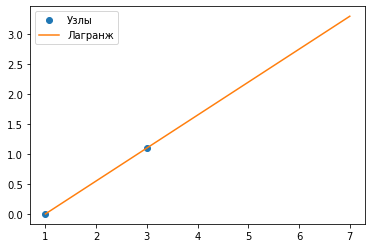

x:  [1, 5]
y:  [0.0, 1.61]
f(2) =  0.402


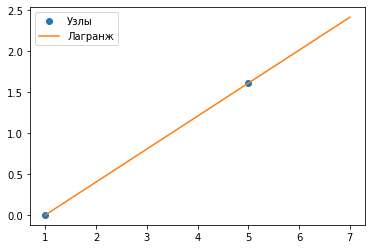

x:  [1, 7]
y:  [0.0, 1.95]
f(2) =  0.325


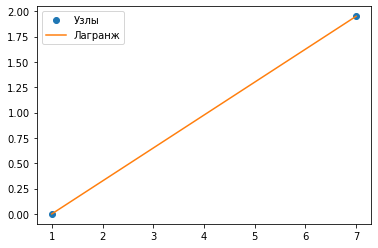

x:  [3, 5]
y:  [1.1, 1.61]
f(2) =  0.845


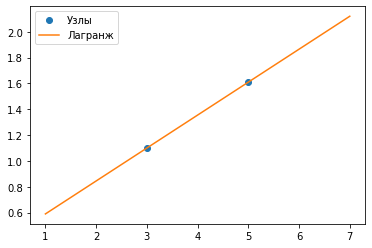

x:  [3, 7]
y:  [1.1, 1.95]
f(2) =  0.888


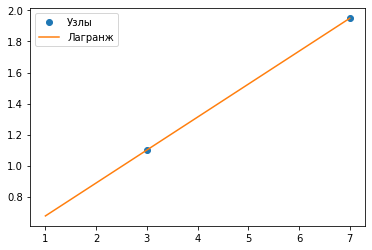

x:  [5, 7]
y:  [1.61, 1.95]
f(2) =  1.1


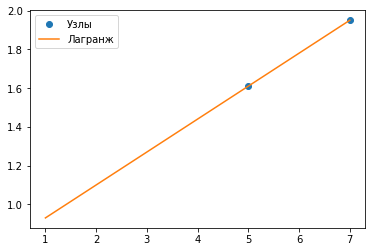

In [19]:
for i in range(len(x)):
    for j in range(i + 1, len(x)):
        x_cords = [x[i], x[j]]
        y_cords = [y[i], y[j]]
        print('x: ', x_cords)
        print('y: ', y_cords)
        print('f(2) = ', np.around(lagrange(x_cords, y_cords, 2), decimals = 3))
        f2[str(x_cords)] = np.around(lagrange(x_cords, y_cords, 2), decimals = 3)
        cord_X = np.linspace(1 , 7, 50)
        cord_Y = [lagrange(x_cords, y_cords, i) for i in cord_X]
        #print(lagrange(rand_X, rand_Y, 2))
        plt.plot(x_cords, y_cords, 'o', label="Узлы")
        plt.plot(cord_X, cord_Y, label="Лагранж")
        plt.legend()
        plt.show()

Построение многочлена Лагранжа второй степени, а так же нахождение значения многочлена в точке x* = 2

x:  [1, 3, 5]
y:  [0.0, 1.1, 1.61]
f(2) =  0.624


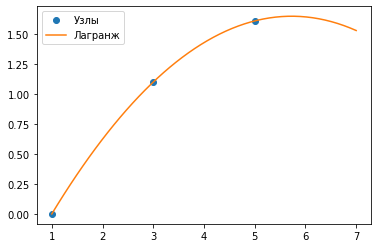

x:  [1, 3, 7]
y:  [0.0, 1.1, 1.95]
f(2) =  0.606


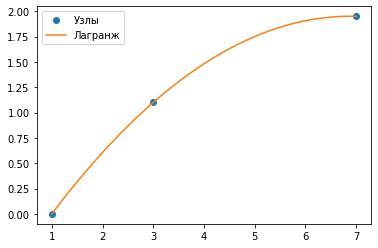

x:  [1, 5, 7]
y:  [0.0, 1.61, 1.95]
f(2) =  0.519


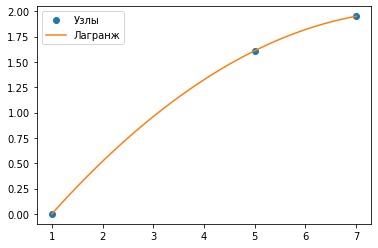

x:  [3, 5, 7]
y:  [1.1, 1.61, 1.95]
f(2) =  0.781


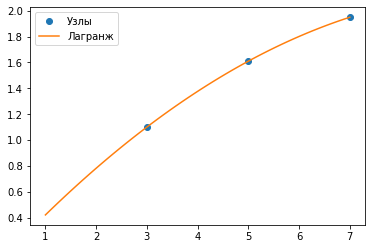

In [20]:
for i in range(len(x)):
    for j in range(i + 1, len(x)):
        for k in range( j + 1, len(x)):
            x_cords = [x[i], x[j], x[k]]
            y_cords = [y[i], y[j], y[k]]
            print('x: ', x_cords)
            print('y: ', y_cords)
            print('f(2) = ', np.around(lagrange(x_cords, y_cords, 2), decimals = 3))
            f2[str(x_cords)] = np.around(lagrange(x_cords, y_cords, 2), decimals = 3)
            cord_X = np.linspace(1 , 7, 50)
            cord_Y = [lagrange(x_cords, y_cords, i) for i in cord_X]
            #print(lagrange(rand_X, rand_Y, 2))
            plt.plot(x_cords, y_cords, 'o', label="Узлы")
            plt.plot(cord_X, cord_Y, label="Лагранж")
            plt.legend()
            plt.show()

Вывод полученных значений многочленов Лагранжа в точке x* = 2 с указанием взятых точек при получении этого значения

In [21]:
sum = 0
for i in f2:
    sum += f2[i]
    print(str(i) + ':', f2[i])
print('Среднее значение =', np.around(sum/len(f2), decimals = 3))

[1, 3]: 0.55
[1, 5]: 0.402
[1, 7]: 0.325
[3, 5]: 0.845
[3, 7]: 0.888
[5, 7]: 1.1
[1, 3, 5]: 0.624
[1, 3, 7]: 0.606
[1, 5, 7]: 0.519
[3, 5, 7]: 0.781
Среднее значение = 0.664


Задание 2:
Записать таблицы разделенных или конечных разностей и построить многочлены Ньютона
2 и 3 степеней для сеточного представления формульной функции f(x). Найти значения
многочленов в точке x* = 2.

Заполнение таблицы для построения многочлена Ньютона

In [22]:
tabl = []
def zapoln_tabl_for_newton(x, y):
    global tabl
    tabl = [[0 for j in range(len(x) - i + 1)] for i in range(len(x) +1)]
    for i in range(len(x)):
        tabl[0][i] = x[i]
    for i in range(len(x)):
        tabl[1][i] = y[i]
    for i in range(1, len(x)):
        tabl[2][i-1] = (y[i] - y[i-1]) / (x[i] - x[i-1])
    for i in range(3, len(x) + 1):
        for j in range(len(x) - i + 1):
            tabl[i][j] = (tabl[i-1][j+1] - tabl[i-1][j])/(x[j + i -1] - x[j])

Функция возвращает значение многочлена Ньютона в точке t

In [23]:
def newton(x, y, t):
    zapoln_tabl_for_newton(x, y)
    ans = y[0]
    prod = 1
    for i in range(1, len(x)):
        prod = tabl[i+1][0]
        for j in range(i):
            prod = prod*(t-x[j])
        ans = ans + prod
    return ans

Построение многочлена Ньютона второй степени, а так же нахождение значения многочлена в точке x* = 2

x:  [1, 3, 5]
y:  [0.0, 1.1, 1.61]
f(2) =  0.624
Таблица:
1 0.0 0.55 -0.074 
3 1.1 0.255 
5 1.61 
0 


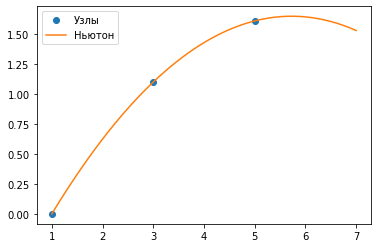

x:  [1, 3, 7]
y:  [0.0, 1.1, 1.95]
f(2) =  0.606
Таблица:
1 0.0 0.55 -0.056 
3 1.1 0.212 
7 1.95 
0 


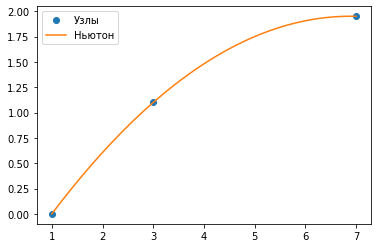

x:  [1, 5, 7]
y:  [0.0, 1.61, 1.95]
f(2) =  0.519
Таблица:
1 0.0 0.402 -0.039 
5 1.61 0.17 
7 1.95 
0 


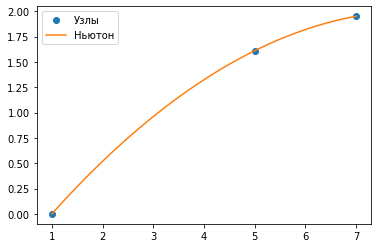

x:  [3, 5, 7]
y:  [1.1, 1.61, 1.95]
f(2) =  0.781
Таблица:
3 1.1 0.255 -0.021 
5 1.61 0.17 
7 1.95 
0 


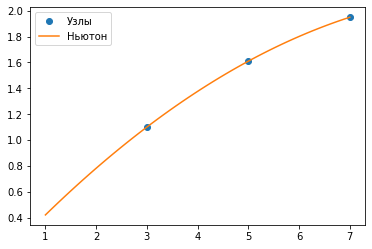

In [24]:
f2 = {}
for i in range(len(x)):
    for j in range(i + 1, len(x)):
        for k in range( j + 1, len(x)):
            x_cords = [x[i], x[j], x[k]]
            y_cords = [y[i], y[j], y[k]]
            print('x: ', x_cords)
            print('y: ', y_cords)
            print('f(2) = ', np.around(newton(x_cords, y_cords, 2), decimals = 3))
            f2[str(x_cords)] = np.around(newton(x_cords, y_cords, 2), decimals = 3)
            cord_X = np.linspace(1 , 7, 50)
            cord_Y = [newton(x_cords, y_cords, i) for i in cord_X]
            print('Таблица:')
            #print(tabl)
            for itab in range(len(x)):
                strok = ''
                for jtab in range( len(tabl) - itab):
                    strok += str(np.around(tabl[jtab][itab], decimals = 3)) + ' '
                print(strok)
                
            plt.plot(x_cords, y_cords, 'o', label="Узлы")
            plt.plot(cord_X, cord_Y, label="Ньютон")
            plt.legend()
            plt.show()

Построение многочлена Ньютона третьей степени, а так же нахождение значения многочлена в точке x* = 2

x:  [1, 3, 5, 7]
y:  [0.0, 1.1, 1.61, 1.95]
f(2) =  0.65
Таблица:
1 0.0 0.55 -0.074 0.009 
3 1.1 0.255 -0.021 
5 1.61 0.17 
7 1.95 


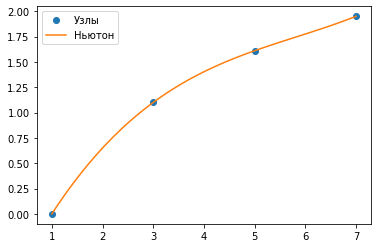

In [25]:
x_cords = [x[0], x[1], x[2], x[3]]
y_cords = [y[0], y[1], y[2], y[3]]
print('x: ', x_cords)
print('y: ', y_cords)
print('f(2) = ', np.around(newton(x_cords, y_cords, 2), decimals = 3))
f2[str(x_cords)] = np.around(newton(x_cords, y_cords, 2), decimals = 3)
cord_X = np.linspace(np.min(x_cords) , np.max(x_cords), 50)
cord_Y = [newton(x_cords, y_cords, i) for i in cord_X]
print('Таблица:')
#print(tabl)
for itab in range(len(x)):
    strok = ''
    for jtab in range( len(tabl) - itab):
        strok += str(np.around(tabl[jtab][itab], decimals = 3)) + ' '
    print(strok)
    
plt.plot(x_cords, y_cords, 'o', label="Узлы")
plt.plot(cord_X, cord_Y, label="Ньютон")
plt.legend()
plt.show()

Вывод полученных значений многочленов Ньютона в точке x* = 2 с указанием взятых точек при получении этого значения

In [26]:
sum = 0
for i in f2:
    sum += f2[i]
    print(str(i) + ':', f2[i])
print('Среднее значение =', np.around(sum/len(f2), decimals = 3))

[1, 3, 5]: 0.624
[1, 3, 7]: 0.606
[1, 5, 7]: 0.519
[3, 5, 7]: 0.781
[1, 3, 5, 7]: 0.65
Среднее значение = 0.636


Задание 3:
С какой точностью можно вычислить значение f(x) в точке x* на основе многочленов
Лагранжа 1 и 2 степеней.

Просчитывание производных f(x) = ln(x) для дальнейших вычислений

In [27]:
z = sympy.Symbol('z')
fz = sympy.ln(z)
proizv = [fz]
proizv.append(fz.diff(z))
proizv.append(proizv[1].diff(z))
proizv.append(proizv[2].diff(z))


Конвертация симвельного вида выражения во float

In [28]:
def convert(x):
    try:
        return float(x)
    except ValueError:
        num, denom = x.split('/')
        return float(num) / float(denom)

Анализ погрешности многочленов Лагранжа первой степени.

In [29]:
min_pogr = 1e10
tochki_min_pogr = ''
for i in range(0, len(x)):
    for j in range(i + 1, len(x)):
        n = 2
        x_cords = [x[i], x[j]]
        y_cords = [y[i], y[j]]
        print('x: ', x_cords)
        print('y: ', y_cords)
        print('f(2) = ', np.around(lagrange(x_cords, y_cords, 2), decimals = 3))
        f2[str(x_cords)] = np.around(lagrange(x_cords, y_cords, 2), decimals = 3)
        w = (2-x[i])*(2-x[j])
        M = max(abs(convert(proizv[n].subs(z, x[i]))), abs(convert(proizv[n].subs(z, x[j]))))
        pogr = np.around(abs(M) * abs(w) / math.factorial(n), decimals = 3)
        if(pogr < min_pogr):
            min_pogr = pogr
            tochki_min_pogr = []
            tochki_min_pogr = str(x_cords)
        print('Оценка погрешности: ', pogr)
        print('_____')
print('Значение с максимальной точностью: ')
print(tochki_min_pogr, ':', f2[tochki_min_pogr], '+-', min_pogr)

x:  [1, 3]
y:  [0.0, 1.1]
f(2) =  0.55
Оценка погрешности:  0.5
_____
x:  [1, 5]
y:  [0.0, 1.61]
f(2) =  0.402
Оценка погрешности:  1.5
_____
x:  [1, 7]
y:  [0.0, 1.95]
f(2) =  0.325
Оценка погрешности:  2.5
_____
x:  [3, 5]
y:  [1.1, 1.61]
f(2) =  0.845
Оценка погрешности:  0.167
_____
x:  [3, 7]
y:  [1.1, 1.95]
f(2) =  0.888
Оценка погрешности:  0.278
_____
x:  [5, 7]
y:  [1.61, 1.95]
f(2) =  1.1
Оценка погрешности:  0.3
_____
Значение с максимальной точностью: 
[3, 5] : 0.845 +- 0.167


Анализ погрешности многочленов Лагранжа второй степени.

In [30]:
min_pogr = 1e10
tochki_min_pogr = ''
for i in range(0, len(x)):
    for j in range(i + 1, len(x)):
        for k in range(j + 1, len(x)):
            n = 3
            x_cords = [x[i], x[j], x[k]]
            y_cords = [y[i], y[j], y[k]]
            print('x: ', x_cords)
            print('y: ', y_cords)
            print('f(2) = ', np.around(lagrange(x_cords, y_cords, 2), decimals = 3))
            f2[str(x_cords)] = np.around(lagrange(x_cords, y_cords, 2), decimals = 3)
            w = (2-x[i])*(2-x[j])*(2-x[k])
            M = max(abs(convert(proizv[n].subs(z, x[i]))), abs(convert(proizv[n].subs(z, x[k]))))
            pogr = np.around(abs(M) * abs(w) / math.factorial(n), decimals = 3)
            if(pogr < min_pogr):
                min_pogr = pogr
                tochki_min_pogr = []
                tochki_min_pogr = str(x_cords)
            print('Оценка погрешности: ', pogr)
            print('_____')
            
            
print('Значение с максимальной точностью: ')
print(tochki_min_pogr, ':', f2[tochki_min_pogr], '+-', min_pogr)

x:  [1, 3, 5]
y:  [0.0, 1.1, 1.61]
f(2) =  0.624
Оценка погрешности:  1.0
_____
x:  [1, 3, 7]
y:  [0.0, 1.1, 1.95]
f(2) =  0.606
Оценка погрешности:  1.667
_____
x:  [1, 5, 7]
y:  [0.0, 1.61, 1.95]
f(2) =  0.519
Оценка погрешности:  5.0
_____
x:  [3, 5, 7]
y:  [1.1, 1.61, 1.95]
f(2) =  0.781
Оценка погрешности:  0.185
_____
Значение с максимальной точностью: 
[3, 5, 7] : 0.781 +- 0.185
